In [1]:
# In Class Lab 3
# G. Besla 

# import relevant modules 
import astropy.units as u
import numpy as np

The Large Magellanic Cloud is at a distance of 50 kpc from the Galactic Center. 
It is observed to have a stellar disk that extends to a radius of at least 18.5 kpc.

![LMC](./Lab3_Tidal.png)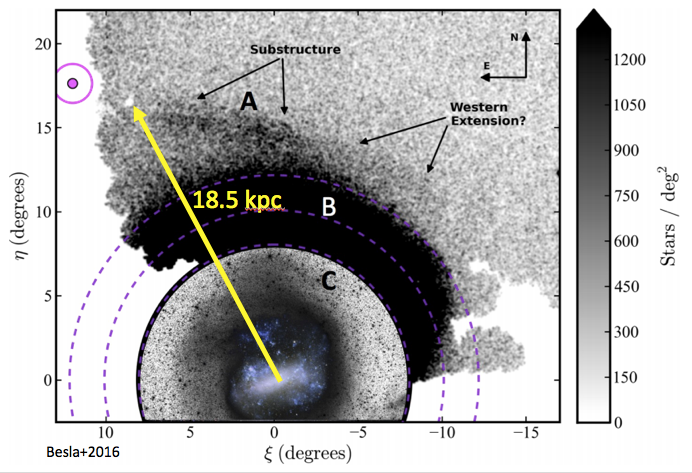
Deep photometric imaging reveals the faint stellar outskirts of the LMC. 
Outskirts: DECam data Mackey+2016 MNRAS 459, 239. 
Inner: shallower imaging from robotic telescopes Besla+2016 APJ 825.

In this lab we will determine
the minimum mass required for the LMC so that it maintains the observed radius 
in the face of the Milky Way's tidal field. 

# Part A

We define the mass profile of the Milky Way using a Hernquist profile.


$\rho(r) =  \frac{M_{halo}}{2\pi} \frac{a}{r(r+a)^3} \qquad M(r) =  \frac{M_{halo} r^2}{(a+r)^2}$ 



## #1

Create a function `HernquistM` that returns the dark matter halo mass at a given radius in units of solar mass.
This function should take as input:  the distance from the Galactic center $r$, the scale radius $a$, and the halo mass $M_{halo}$.


For the Hernquist scale radius for the Milky Way, use the default value of $a=60$ kpc. 

For $M_{halo}$ use your answer for the total mass of the simulated Milky Way you computed in Homework 3 as the default value (in units of 1e12). 

In [2]:
# Function that returns Hernquist 1990 Mass profile
def HernquistM(r,a=60,Mhalo=1.97):
    # Inpputs:
    #   r = distance from galaxy (kpc)
    #   a = scale radius (kpc)
    #   halo = totatl dark matter halo mass (10^12 Msun)
    # Return:
    #   Total dark matter enclosed within r (Msun)
    return np.around(Mhalo*r**2/(a+r)**2,2)*1e12*u.Msun

In [3]:
HernquistM(10000)

<Quantity 1.95e+12 solMass>

In [4]:
HernquistM(260)

<Quantity 1.3e+12 solMass>

In [5]:
HernquistM(50)

<Quantity 4.1e+11 solMass>

In [6]:
# Bulge Mass
Mbulge = 1e10*u.Msun

# Disk Mass
Mdisk = 7.5e10*u.Msun

# Halo mass within 50 kpc + Disk mass + Bulge mass
MassMW50 = HernquistM(50) + Mdisk + Mbulge

In [7]:
MassMW50

<Quantity 4.95e+11 solMass>

# Part B

The Jacobi Radius for a satellite on a circular orbit about an extended host, where 
the host is assumed to be well modeled as an isothermal sphere halo:


$R_j = r  \bigg( \frac{M_{sat}}{2 M_{host}(<r)} \bigg)^{1/3}$


The Isothermal Sphere approximation is not a bad one within 50 kpc.

Note also that the LMC is not on a circular orbit, but it is very close to its pericentric approach, where the velocity is all in the tangential component. So this isn't a terrible approximation either. 

## #1
Create a function called `JacobiMass` that returns the total mass of a satellite galaxy in units of Msun, 
such that it has a given size 

Do this by rearranging the Jacobi Radius equation to solve for the satellite mass. 


In [9]:
# Function that returns minimum mass of a satellite given its observed size and distance from a massive host
# Msat = ((Rj/r)**3) * (2*Mhost)
def JacobiMass(Rj,r,Mhost):
    # Inputs:
        # Rj = Jacobi Radius, approximated as observed size of satellite (kpc)
        # r = distance between satellite and host (kpc)
        # Mhost = total mass of the host enclosed within r (Msun)
    # Returns:
        # Minimum mass of a satellite given its current size (Msun)
    return (Rj/r)**3*2*Mhost

## #2 

Determine the minimum total mass of the LMC needed to maintain its radius of 18.5 kpc in the face of the Milky Way's tidal 
field at its current distance of 50 kpc. Store this as a variable called `LMCJacobiMass`.

In [13]:
# Observed size of LMC disk
SizeL = 18.5*u.kpc # Mackey+2016

# Distance to the LMC
DistL = 50.0*u.kpc

In [14]:
# Minimum mass of the LMC
LMCJacobiMass = JacobiMass(SizeL,DistL,MassMW50)
LMCJacobiMass

<Quantity 5.014647e+10 solMass>

## #3

Recall that, ignoring centrifugal forces and assuming the host is a point mass, the tidal radius is given as :

$r_{tide} = r\left (\frac{m_{sat}}{4M_{host} } \right)^{1/3} $

Create a function to determine the total mass the must LMC possess to have a disk with radius 18.5 kpc.

The function should take as input, the current size of the satellite (kpc), this distnce ot the host(kpc) and the mass of the host (in Msun)

Use the function to determine the needed LMC mass and store it as a variable called `LMCTidalMass`. 

## #4

Compare `LMCTidalMass` to the calculation using the Jacobi Radius.

How does the total mass of the LMC compare to its stellar mass (M$_\ast = 3 \times 10^9$ M$_\odot$)? 


In [15]:
# Stellar mass of the LMC
LMCStar = 3e9*u.Msun

In [19]:
LMCJacobiMass/LMCStar

<Quantity 16.71549>

In [29]:
# Part C: Consistency Check


The maximal enclosed mass of the LMC at any radius can be determined by assuming a flat rotation curve. 

$V_c^2 = \frac{G M}{r} = constant$
 
The rotation curve of the LMC is observed to flatten at a value of 91.7 +/- 18.8 km/s  (van der Marel & Kallivayalil 2014 ApJ 781)
  (note that 1 kpc/Gyr $\sim$ 1 km/s). 
  
    Create a function called `MaxMass` that takes as input Vc (km/s) and distance to from the center of the galaxy (r) and returns the maximal dynamical mass in Msun. 
 


SyntaxError: invalid syntax (<ipython-input-29-712f0719452c>, line 4)

In [21]:
# gravitational constant in units of kpc^3/Gyr^2/Msun
G = 4.498768e-6*u.kpc**3/u.Gyr**2/u.Msun

In [22]:
# Function that returns maximal mass of a satellite, assuming flat rotation curve
def MaxMass(Vc, Size):
    return Vc**2*Size/G

  
## #1  
Compute the maximal mass enclosed by the LMC within the observed radius. Store it as a variable called `LMCMassMax`. 

In [23]:
LMCMassMax = MaxMass(91.7*u.km/u.s,18.5*u.kpc)
LMCMassMax

<Quantity 3.45793482e+10 Gyr2 km2 solMass / (kpc2 s2)>

## #2

Is `LMCMassMax` consistent with `LMCMassMin`, the minimum mass needed to explain the observed radius of the LMC given the tidal field of the MW? If not, how can the numbers be reconciled?

In [28]:
JacobiMass(SizeL,DistL,3e11*u.Msun)

<Quantity 3.03918e+10 solMass>